In [1]:
import pandas as pd
import seaborn as sns

In [2]:
dataset= pd.read_csv('Titanic_train.csv')

In [3]:
dataset
# survival - Survival (0 = No; 1 = Yes)
# class - Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)
# name - Name
# sex - Sex
# age - Age
# sibsp - Number of Siblings/Spouses Aboard
# parch - Number of Parents/Children Aboard
# ticket - Ticket Number
# fare - Passenger Fare
# cabin - Cabin
# embarked - Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
y=dataset['Survived']

In [5]:
dataset.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [6]:
X=dataset[['Pclass','Sex', 'Age', 'SibSp',
       'Parch', 'Cabin']]

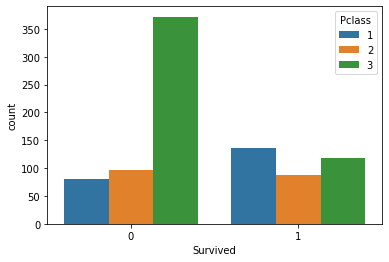

In [7]:
sns.countplot(dataset['Survived'], hue=dataset['Pclass'], data=dataset)

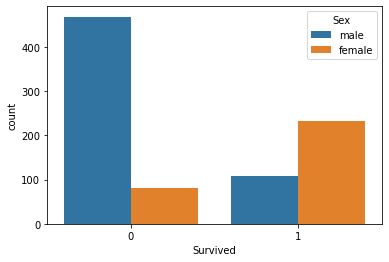

In [8]:
sns.countplot(dataset['Survived'], hue=dataset['Sex'], data=dataset)

In [9]:
# sns.countplot(dataset['Survived'], hue=dataset['Age'], data=dataset)
# sns.countplot(dataset['Survived'], hue=dataset['SibSp'], data=dataset)

# missing values in Age and Cabin
dataset.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


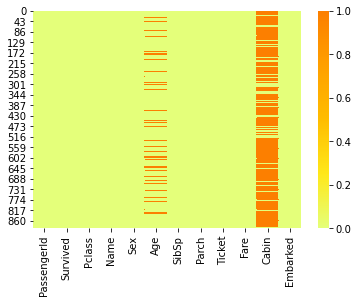

In [10]:
# visual representation of missing values
sns.heatmap(dataset.isnull(), cmap='Wistia')

In [11]:
# We have too many missing values in Cabin, so we'll eliminate this feature completely
X.drop('Cabin', axis=1, inplace=True)

C:\Users\Ishika\anaconda3\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [12]:
X

,Pclass,Sex,Age,SibSp,Parch
0,3,male,22.0,1,0
1,1,female,38.0,1,0
2,3,female,26.0,0,0
3,1,female,35.0,1,0
4,3,male,35.0,0,0
...,...,...,...,...,...
886,2,male,27.0,0,0
887,1,female,19.0,0,0
888,3,female,NaN,1,2
889,1,male,26.0,0,0


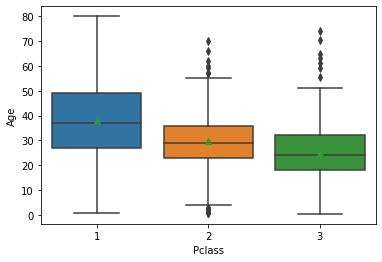

In [13]:
sns.boxplot(y=dataset['Age'], x=dataset['Pclass'], showmeans=True)

In [14]:
def missingAge(data):
    age=data[0]
    Pclass=data[1]
    if pd.isnull(age):
        if Pclass == 1:
            return 38
        elif Pclass == 2:
            return 29
        elif Pclass == 3:
            return 25
    else:
        return age

In [15]:
age=dataset[['Age','Pclass']].apply(missingAge, axis=1)

In [16]:
age

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888    25.0
889    26.0
890    32.0
Length: 891, dtype: float64

In [17]:
# Pclass, Sex ,SibSp and Parch are categorical features
# Using one-hot encoding and dropping 1st column to avoid dummy variable trap
Pclass=pd.get_dummies(dataset['Pclass'], drop_first=True)
Sex=pd.get_dummies(dataset['Sex'], drop_first=True)
SibSp=pd.get_dummies(dataset['SibSp'], drop_first=True)
Parch=pd.get_dummies(dataset['Parch'], drop_first=True)

In [18]:
X_final= pd.concat([Pclass,Sex, age, SibSp, Parch ], axis=1)
X_final

,2,3,male,0,1,2,3,4,5,8,1,2,3,4,5,6
0,0,1,1,22.0,1,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,38.0,1,0,0,0,0,0,0,0,0,0,0,0
2,0,1,0,26.0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,35.0,1,0,0,0,0,0,0,0,0,0,0,0
4,0,1,1,35.0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,1,0,1,27.0,0,0,0,0,0,0,0,0,0,0,0,0
887,0,0,0,19.0,0,0,0,0,0,0,0,0,0,0,0,0
888,0,1,0,25.0,1,0,0,0,0,0,0,1,0,0,0,0
889,0,0,1,26.0,0,0,0,0,0,0,0,0,0,0,0,0


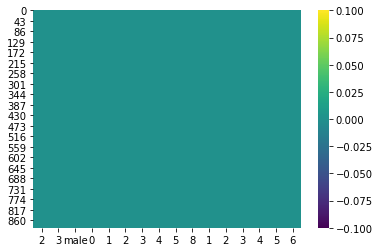

In [19]:
sns.heatmap(X_final.isnull(), cmap='viridis')

In [20]:
X_final.dropna()

,2,3,male,0,1,2,3,4,5,8,1,2,3,4,5,6
0,0,1,1,22.0,1,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,38.0,1,0,0,0,0,0,0,0,0,0,0,0
2,0,1,0,26.0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,35.0,1,0,0,0,0,0,0,0,0,0,0,0
4,0,1,1,35.0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,1,0,1,27.0,0,0,0,0,0,0,0,0,0,0,0,0
887,0,0,0,19.0,0,0,0,0,0,0,0,0,0,0,0,0
888,0,1,0,25.0,1,0,0,0,0,0,0,1,0,0,0,0
889,0,0,1,26.0,0,0,0,0,0,0,0,0,0,0,0,0


In [21]:
y.dropna()

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [22]:
X_final.shape

(891, 16)

In [23]:
y.shape

(891,)

In [24]:
X_final = X_final.iloc[:, :-1]

In [25]:
X_final.shape

(891, 15)

In [26]:
X_final

,2,3,male,0,1,2,3,4,5,8,1,2,3,4,5
0,0,1,1,22.0,1,0,0,0,0,0,0,0,0,0,0
1,0,0,0,38.0,1,0,0,0,0,0,0,0,0,0,0
2,0,1,0,26.0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,35.0,1,0,0,0,0,0,0,0,0,0,0
4,0,1,1,35.0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,1,0,1,27.0,0,0,0,0,0,0,0,0,0,0,0
887,0,0,0,19.0,0,0,0,0,0,0,0,0,0,0,0
888,0,1,0,25.0,1,0,0,0,0,0,0,1,0,0,0
889,0,0,1,26.0,0,0,0,0,0,0,0,0,0,0,0


In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_final, y, test_size=0.20, random_state=42)

In [28]:
from sklearn.linear_model import LogisticRegression
model= LogisticRegression()
model.fit(X_train, y_train)

C:\Users\Ishika\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [29]:
y_test

709    1
439    0
840    0
720    1
39     1
      ..
433    0
773    0
25     1
84     1
10     1
Name: Survived, Length: 179, dtype: int64

In [30]:
y_predict= model.predict(X_test)
y_predict

array([0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 1], dtype=int64)

In [31]:
# finding accuracy: confusion matrix

from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_predict)

array([[92, 13],
       [21, 53]], dtype=int64)

In [32]:
correct= 92+53
incorrect= 13+21
accuracy= correct/(correct+incorrect)
accuracy=accuracy*100

In [33]:
# accuracy percentage
accuracy

81.00558659217877